# Problem 1

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import metrics
import re


In [ ]:
comp_tech_subclasses = ['comp.graphics', 
                        'comp.os.ms-windows.misc', 
                        'comp.sys.ibm.pc.hardware', 
                        'comp.sys.mac.hardware']
                        
rec_act_subclasses = ['rec.autos', 
                      'rec.motorcycles', 
                      'rec.sport.baseball', 
                      'rec.sport.hockey']
  
dataset = fetch_20newsgroups(subset='all',
                             categories=comp_tech_subclasses+rec_act_subclasses,
                             shuffle=True,
                             random_state=42,
                             remove=('headers', 'footers', 'quotes'))
# training data for 8 classes
training_data = fetch_20newsgroups(subset='train', categories=comp_tech_subclasses+rec_act_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))


labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0


In [ ]:
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join(re.split(punctuations, data_list[i]))
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
remove_punctuation_and_stem(dataset.data)

count_vect_mindf3 = CountVectorizer(min_df=3, stop_words ='english')
X_counts_mindf3 = count_vect_mindf3.fit_transform(training_data.data)
X_counts_mindf3_all = count_vect_mindf3.fit_transform(dataset.data)
tfidf_transformer = TfidfTransformer()

X_tfidf_mindf3 = tfidf_transformer.fit_transform(X_counts_mindf3)
X_tfidf_mindf3_all = tfidf_transformer.fit_transform(X_counts_mindf3_all)

In [ ]:
print (X_tfidf_mindf3.shape)
print (X_tfidf_mindf3_all.shape)

# Problem 2: 

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km.fit(X_tfidf_mindf3_all)

In [ ]:
print ('Homogeneity:' + str(metrics.homogeneity_score(labels, km.labels_)))
print ('Completeness:'+ str(metrics.completeness_score(labels, km.labels_)))
print ('V-measure:'+ str(metrics.v_measure_score(labels, km.labels_)))
print ('Adjusted Rand Score:'+str(metrics.adjusted_rand_score(labels, km.labels_)))
print ('Adjusted Mutual Info Score:'+ str(metrics.adjusted_mutual_info_score(labels, km.labels_)))
print ('\nConfusion matrix:')
print ('==============')
print (metrics.confusion_matrix(labels, km.labels_))
print ('==============')

# Problem 3:

Calculating singular values...
(7882, 19330)
6207.25404142
[4101.0735079312217, 4008.9695934152624, 3970.362505158781, 3943.0344302603248, 3919.4231218038431, 3897.5251548986635, 3876.9851092251665, 3859.1286037605705, 3843.0350097553437, 3827.234213559615, 3812.1871372416172, 3797.8198856268887, 3783.736598514377, 3770.0613079071022, 3756.6867538254587, 3743.4497336590075, 3730.6432198508019, 3718.1336598518242, 3705.8745779323608, 3693.7547533607712, 3682.1478253734522, 3670.6737049799081, 3659.3342502196947, 3648.2957322441384, 3637.3919867845611, 3626.5338847953094, 3615.7975581953488, 3605.1786667376391, 3594.8502051557502, 3584.6516147451703, 3574.4965749389698, 3564.4780028275386, 3554.4798152067729, 3544.5033449355137, 3534.5885562016883, 3524.7468183178398, 3514.9963665609716, 3505.2965235779507, 3495.6284187097731, 3486.0632050305612, 3476.6579583448665, 3467.3312032413355, 3458.0309703039675, 3448.7546023365699, 3439.5646317858118, 3430.422788046078, 3421.3713485325679, 3412

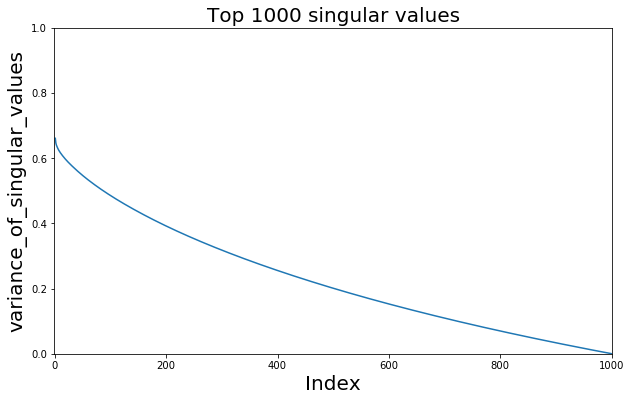

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.sparse.linalg import svds
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from math import log
import numpy as np
import itertools
import matplotlib.pyplot as plt
import re


#=================================Obtain data==================================
comp_tech_subclasses = ['comp.graphics', 
                        'comp.os.ms-windows.misc', 
                        'comp.sys.ibm.pc.hardware', 
                        'comp.sys.mac.hardware']
                        
rec_act_subclasses = ['rec.autos', 
                      'rec.motorcycles', 
                      'rec.sport.baseball', 
                      'rec.sport.hockey']
  
dataset = fetch_20newsgroups(subset='all',
                             categories=comp_tech_subclasses+rec_act_subclasses,
                             shuffle=True,
                             random_state=42,
                             remove=('headers', 'footers', 'quotes'))


labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0
#==============================================================================





#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
# stemmer = SnowballStemmer("english")
def remove_punctuation(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join(re.split(punctuations, data_list[i]))
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
remove_punctuation(dataset.data)
#==============================================================================





#=======================Transform the data into TF-IDF=========================
vectorizer_mindf3 = TfidfVectorizer(min_df=3, stop_words='english')
X_mindf3= vectorizer_mindf3.fit_transform(dataset.data)
#==============================================================================






#=======================Calculate top singular values==========================
print ('Calculating singular values...')
num_of_singular_values = 1000
u, singular_values, vt = svds(X_mindf3.toarray(), num_of_singular_values)
u, all_singular_values, vt = svds(X_mindf3.toarray(), 7500)


total_variance = sum(all_singular_values)
print(X_mindf3.shape)
print(total_variance)


singular_values = [x*x for x in singular_values]
partial_sum_singular_values = list(itertools.accumulate(singular_values))
partial_sum_singular_values = partial_sum_singular_values[::-1] # reverse the list (-1 is the slice step)

print(partial_sum_singular_values)
variance_of_singular_values = [x / total_variance for x in partial_sum_singular_values]
print ('Top, '+ str(variance_of_singular_values) + ' ,' + ' variance_of_singular_values are:')
print (variance_of_singular_values)

# #==============================================================================

# variance_of_singular_values = variance_of_singular_values[::-1]

# plt.figure(figsize = (10,6))
# plt.plot(range(1,1001), variance_of_singular_values)
# plt.ylabel('variance_of_singular_values', fontsize = 20)
# plt.xlabel('Index', fontsize = 20)
# plt.title('Top 1000 singular values', fontsize = 20)
# plt.axis([-1,1001,0,1])
# plt.show()

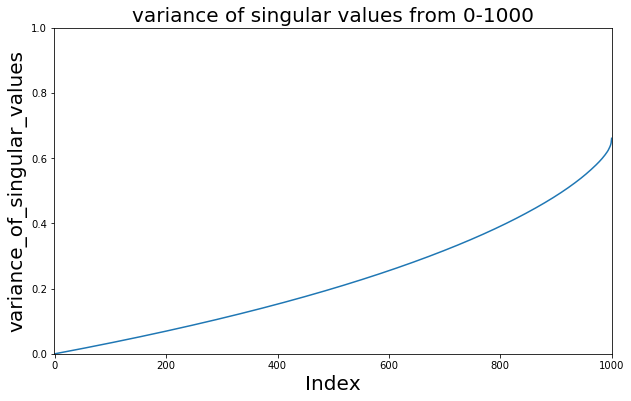

In [35]:
variance_of_singular_values = variance_of_singular_values[::-1]

plt.figure(figsize = (10,6))
plt.plot(range(1,1001), variance_of_singular_values)
plt.ylabel('variance_of_singular_values', fontsize = 20)
plt.xlabel('Index', fontsize = 20)
plt.title('variance of singular values from 0-1000', fontsize = 20)
plt.axis([-1,1001,0,1])
plt.show()

In [2]:

r_list = [1, 2, 3, 5, 10, 20, 50, 100, 300]

SVD_list_Homogeneity = []
SVD_list_Completeness = []
SVD_list_Rand_Score = []
SVD_list_Mutual_Info = []
SVD_list_Mutual_V_Measure = []

NMF_list_Homogeneity = []
NMF_list_Completeness = []
NMF_list_Rand_Score = []
NMF_list_Mutual_Info = []
NMF_list_Mutual_V_Measure = []

PCA_list_Homogeneity = []
PCA_list_Completeness = []
PCA_list_Rand_Score = []
PCA_list_Mutual_Info = []
PCA_list_Mutual_V_Measure = []

def k_means(X_reduced, labels, dim_reduce, i):
    #=============================K-Means Clustering===============================
    km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
    km.fit(X_reduced)
    #==============================================================================
    
    print ('Dimension reduction method:' + dim_reduce)

    if (dim_reduce == 'truncatedSVD'):
        SVD_list_Homogeneity.append(metrics.homogeneity_score(labels, km.labels_)) 
        SVD_list_Completeness.append(metrics.completeness_score(labels, km.labels_))
        SVD_list_Rand_Score.append(metrics.adjusted_rand_score(labels, km.labels_))
        SVD_list_Mutual_Info.append(metrics.adjusted_mutual_info_score(labels, km.labels_))
        SVD_list_Mutual_V_Measure.append(metrics.v_measure_score(labels, km.labels_))
    if (dim_reduce == 'PCA'):
        PCA_list_Homogeneity.append(metrics.homogeneity_score(labels, km.labels_)) 
        PCA_list_Completeness.append(metrics.completeness_score(labels, km.labels_))
        PCA_list_Rand_Score.append(metrics.adjusted_rand_score(labels, km.labels_))
        PCA_list_Mutual_Info.append(metrics.adjusted_mutual_info_score(labels, km.labels_))
        PCA_list_Mutual_V_Measure.append(metrics.v_measure_score(labels, km.labels_))
    if (dim_reduce == 'NMF'):
        NMF_list_Homogeneity.append(metrics.homogeneity_score(labels, km.labels_)) 
        NMF_list_Completeness.append(metrics.completeness_score(labels, km.labels_))
        NMF_list_Rand_Score.append(metrics.adjusted_rand_score(labels, km.labels_))
        NMF_list_Mutual_Info.append(metrics.adjusted_mutual_info_score(labels, km.labels_))
        NMF_list_Mutual_V_Measure.append(metrics.v_measure_score(labels, km.labels_))
    
    #================================Print results=================================
    print ('Dimension reduction method:' + dim_reduce)
    print ('r = ' + str(i))
    print ('Confusion matrix:')
    print ('==============')
    print (metrics.confusion_matrix(labels, km.labels_))
    print ('==============')
    print ('-----------------------------------------------------')
    #==============================================================================






#=========================Reduce Dimensionality (SVD)==========================
print ('##############################################################')
for i in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print ('Performing truncatedSVD...')
    svd = TruncatedSVD(n_components = i, n_iter = 13,random_state = 42)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    
    X_reduced = lsa.fit_transform(X_mindf3)
    
    k_means(X_reduced, labels, 'truncatedSVD', i)
#==============================================================================



#=========================Reduce Dimensionality (PCA)==========================
print ('##############################################################')
for i in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print ('Performing PCA...')    
    pca = PCA(n_components = i, random_state = 42)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(pca, normalizer)
    
    X_reduced = lsa.fit_transform(X_mindf3.toarray())
    
    k_means(X_reduced, labels, 'PCA', i)
#==============================================================================





#=========================Reduce Dimensionality (NMF)==========================
print ('##############################################################')

# nmf = NMF(n_components = 2, random_state = 42)
# lsa = make_pipeline(nmf)
# X_reduced = lsa.fit_transform(X_mindf3)

# plt.clf()
# plt.figure(figsize = (10,6))
# plt.scatter(X_reduced[:,0], X_reduced[:,1], s=3, c='r', alpha=0.8)
# plt.title('Point distribution after NMF', fontsize = 20)
# plt.axis([0,0.16,0,0.2])
# plt.show()


for i in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print ('Performing NMF with logarithm transformation...')
    nmf = NMF(n_components = i, random_state = 42)
    lsa = make_pipeline(nmf)
    
    X_reduced = lsa.fit_transform(X_mindf3)
    
#     #----------------------------Non-linear Transformation-------------------------
#     for j in range(X_reduced.shape[0]):
#         for k in range(X_reduced.shape[1]):
#             if X_reduced[j][k] == 0:
#                 X_reduced[j][k] = -3.08
#             else:
#                 X_reduced[j][k] = log(X_reduced[j][k], 10)
#     #------------------------------------------------------------------------------
      
    k_means(X_reduced, labels, 'NMF', i)
#==============================================================================

# print("plot SVD")
# plt.figure(figsize = (10,6))
# line1, = plt.plot(r_list, SVD_list_Homogeneity, label = "SVD_Homogeneity")
# line2, = plt.plot(r_list, SVD_list_Completeness, label = "SVD_Completeness")
# line3, = plt.plot(r_list, SVD_list_Mutual_V_Measure, label = "SVD_Mutual_V_Measure")
# line4, = plt.plot(r_list, SVD_list_Rand_Score, label = "SVD_Rand_Score")
# line5, = plt.plot(r_list, SVD_list_Mutual_Info, label = "SVD_Mutual_Info")

# plt.ylabel('SVD_Scores', fontsize = 20)
# plt.xlabel('r_value', fontsize = 20)
# plt.title('SVD Scores vs r Values', fontsize = 20)
# plt.axis([-1,350,0,1])
# plt.legend(handles=[line1, line2, line3, line4, line5], loc=4)
# plt.show()

# print("plot PCA")
# plt.figure(figsize = (10,6))
# line6, = plt.plot(r_list, PCA_list_Homogeneity, label = "PCA_Homogeneity")
# line7, = plt.plot(r_list, PCA_list_Completeness, label = "PCA_Completeness")
# line8, = plt.plot(r_list, PCA_list_Mutual_V_Measure, label = "PCA_Mutual_V_Measure")
# line9, = plt.plot(r_list, PCA_list_Rand_Score, label = "PCA_Rand_Score")
# line10, = plt.plot(r_list, PCA_list_Mutual_Info, label = "PCA_Mutual_Info")

# plt.ylabel('PCA_Scores', fontsize = 20)
# plt.xlabel('r_value', fontsize = 20)
# plt.title('PCA Scores vs r Values', fontsize = 20)
# plt.axis([-1,350,0,1])
# plt.legend(handles=[line6, line7, line8, line9, line10], loc=4)
# plt.show()

# print("plot NMF")
# plt.figure(figsize = (10,6))
# line11, = plt.plot(r_list, NMF_list_Homogeneity, label = "NMF_Homogeneity")
# line12, = plt.plot(r_list, NMF_list_Completeness, label = "NMF_Completeness")
# line13, = plt.plot(r_list, NMF_list_Mutual_V_Measure, label = "NMF_Mutual_V_Measure")
# line14, = plt.plot(r_list, NMF_list_Rand_Score, label = "NMF_Rand_Score")
# line15, = plt.plot(r_list, NMF_list_Mutual_Info, label = "NMF_Mutual_Info")

# plt.ylabel('NMF_Scores', fontsize = 20)
# plt.xlabel('r_value', fontsize = 20)
# plt.title('NMF Scores vs r Values', fontsize = 20)
# plt.axis([-1,350,0,1])
# plt.legend(handles=[line11, line12, line13, line14, line15], loc=4)
# plt.show()



##############################################################
Performing truncatedSVD...
Dimension reduction method:truncatedSVD
Dimension reduction method:truncatedSVD
r = 1
Confusion matrix:
[[3819  160]
 [3781  122]]
-----------------------------------------------------
Performing truncatedSVD...
Dimension reduction method:truncatedSVD
Dimension reduction method:truncatedSVD
r = 2
Confusion matrix:
[[3498  481]
 [ 401 3502]]
-----------------------------------------------------
Performing truncatedSVD...
Dimension reduction method:truncatedSVD
Dimension reduction method:truncatedSVD
r = 3
Confusion matrix:
[[ 490 3489]
 [3506  397]]
-----------------------------------------------------
Performing truncatedSVD...
Dimension reduction method:truncatedSVD
Dimension reduction method:truncatedSVD
r = 5
Confusion matrix:
[[ 448 3531]
 [3454  449]]
-----------------------------------------------------
Performing truncatedSVD...
Dimension reduction method:truncatedSVD
Dimension reduction me

NameError: name 'line2' is not defined

plot SVD
SVD==================
300


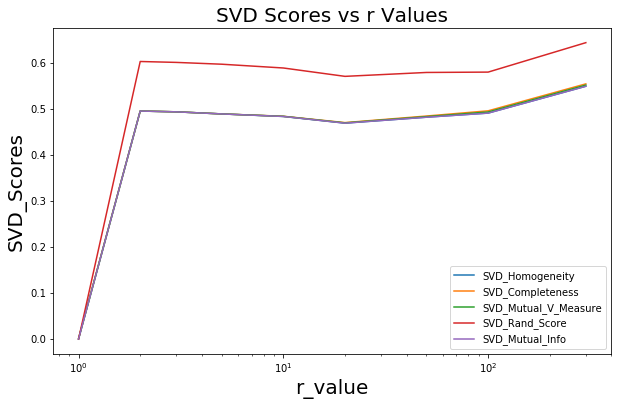

plot PCA
PCA==================
5


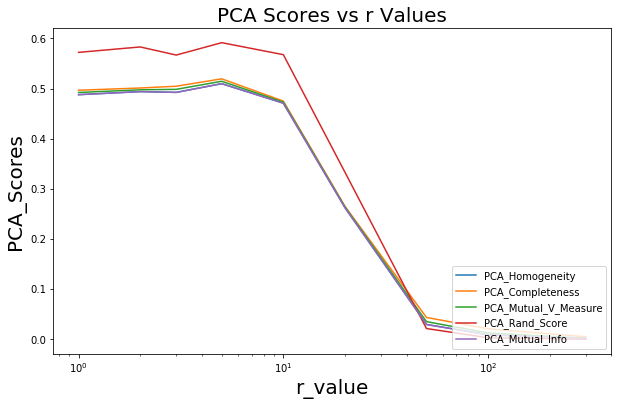

plot NMF
NMF==================
2


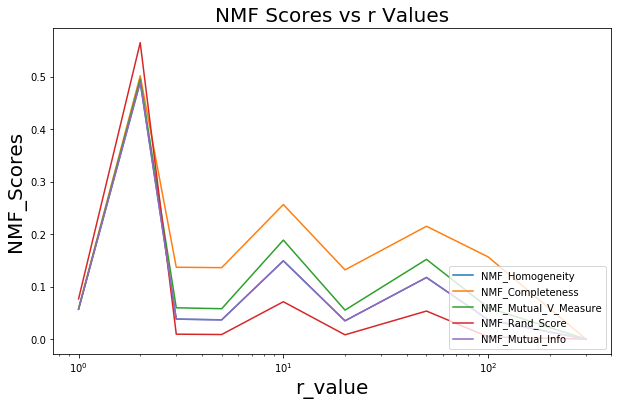

In [9]:
print("plot SVD")
plt.figure(figsize = (10,6))
line1, = plt.plot(r_list, SVD_list_Homogeneity, label = "SVD_Homogeneity")
line2, = plt.plot(r_list, SVD_list_Completeness, label = "SVD_Completeness")
line3, = plt.plot(r_list, SVD_list_Mutual_V_Measure, label = "SVD_Mutual_V_Measure")
line4, = plt.plot(r_list, SVD_list_Rand_Score, label = "SVD_Rand_Score")
line5, = plt.plot(r_list, SVD_list_Mutual_Info, label = "SVD_Mutual_Info")

print('SVD==================')
print(r_list[SVD_list_Mutual_V_Measure.index(max(SVD_list_Mutual_V_Measure))])
print('==================')

plt.ylabel('SVD_Scores', fontsize = 20)
plt.xlabel('r_value', fontsize = 20)
plt.title('SVD Scores vs r Values', fontsize = 20)
# plt.axis([-1,350,0,1])
plt.xscale('log')
plt.legend(handles=[line1, line2, line3, line4, line5], loc=4)
plt.show()

print("plot PCA")
plt.figure(figsize = (10,6))
line6, = plt.plot(r_list, PCA_list_Homogeneity, label = "PCA_Homogeneity")
line7, = plt.plot(r_list, PCA_list_Completeness, label = "PCA_Completeness")
line8, = plt.plot(r_list, PCA_list_Mutual_V_Measure, label = "PCA_Mutual_V_Measure")
line9, = plt.plot(r_list, PCA_list_Rand_Score, label = "PCA_Rand_Score")
line10, = plt.plot(r_list, PCA_list_Mutual_Info, label = "PCA_Mutual_Info")

print('PCA==================')
print(r_list[PCA_list_Mutual_V_Measure.index(max(PCA_list_Mutual_V_Measure))])
print('==================')

plt.ylabel('PCA_Scores', fontsize = 20)
plt.xlabel('r_value', fontsize = 20)
plt.title('PCA Scores vs r Values', fontsize = 20)
# plt.axis([-1,350,0,1])
plt.legend(handles=[line6, line7, line8, line9, line10], loc=4)
plt.xscale('log')
plt.show()

print("plot NMF")
plt.figure(figsize = (10,6))
line11, = plt.plot(r_list, NMF_list_Homogeneity, label = "NMF_Homogeneity")
line12, = plt.plot(r_list, NMF_list_Completeness, label = "NMF_Completeness")
line13, = plt.plot(r_list, NMF_list_Mutual_V_Measure, label = "NMF_Mutual_V_Measure")
line14, = plt.plot(r_list, NMF_list_Rand_Score, label = "NMF_Rand_Score")
line15, = plt.plot(r_list, NMF_list_Mutual_Info, label = "NMF_Mutual_Info")

print('NMF==================')
print(r_list[NMF_list_Mutual_V_Measure.index(max(NMF_list_Mutual_V_Measure))])
print('==================')

plt.ylabel('NMF_Scores', fontsize = 20)
plt.xlabel('r_value', fontsize = 20)
plt.title('NMF Scores vs r Values', fontsize = 20)
# plt.axis([-1,350,0,1])
plt.legend(handles=[line11, line12, line13, line14, line15], loc=4)
plt.xscale('log')
plt.show()



# Problem 4:

##############################################################
Performing truncatedSVD with normalization...
Dimension reduction method:TruncatedSVD
Confusion matrix:
[[3768  211]
 [ 561 3342]]
-----------------------------------------------------


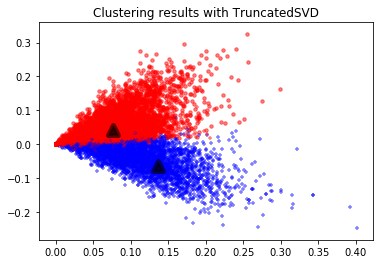

##############################################################
Performing PCA with normalization...
Dimension reduction method:PCA
Confusion matrix:
[[ 158 3821]
 [3151  752]]
-----------------------------------------------------


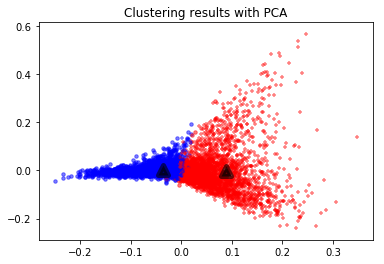

##############################################################
Performing NMF without normalization and without Logarithm...
Dimension reduction method:NMF without Logarithm
Confusion matrix:
[[3830  149]
 [ 833 3070]]
-----------------------------------------------------


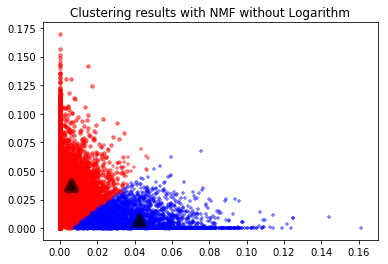

Performing NMF without normalization and with Logarithm...
Dimension reduction method:NMF with Logarithm
Confusion matrix:
[[3489  490]
 [ 386 3517]]
-----------------------------------------------------


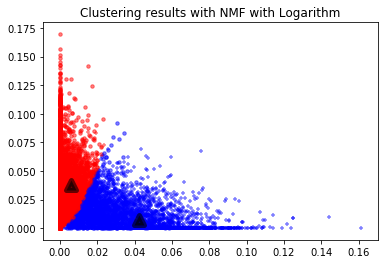

In [18]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from math import log
import matplotlib.pyplot as plt
import re

#=================================Obtain data==================================
comp_tech_subclasses = ['comp.graphics', 
                        'comp.os.ms-windows.misc', 
                        'comp.sys.ibm.pc.hardware', 
                        'comp.sys.mac.hardware']
                        
rec_act_subclasses = ['rec.autos', 
                      'rec.motorcycles', 
                      'rec.sport.baseball', 
                      'rec.sport.hockey']
  
dataset = fetch_20newsgroups(subset='all',
                             categories=comp_tech_subclasses+rec_act_subclasses,
                             shuffle=True,
                             random_state=42,
                             remove=('headers', 'footers', 'quotes'))


labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0
#==============================================================================





#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
# stemmer = SnowballStemmer("english")
def remove_punctuation(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join(re.split(punctuations, data_list[i]))
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
remove_punctuation(dataset.data)
#==============================================================================





#=======================Transform the data into TF-IDF=========================
vectorizer_mindf3 = TfidfVectorizer(min_df=3, stop_words='english')
X_mindf3= vectorizer_mindf3.fit_transform(dataset.data)
#==============================================================================

# ==============================================================================


def plot_clusters(actual_labels, clustered_labels, X_2d, centers, reducer):
    # =================================Plot results=================================
    #================================Print confusion matrix=================================
    print ('Dimension reduction method:' + reducer)
    print ('Confusion matrix:')
    print ('==============')
    print (metrics.confusion_matrix(actual_labels, clustered_labels))
    print ('==============')
    print ('-----------------------------------------------------')
    #==============================================================================
    color = ["r", "b"]
    mark = ["o", "+"]
    for i in range(len(labels)):
        plt.scatter(X_2d[i, 0], X_2d[i, 1], s=12, marker=mark[actual_labels[i]], color=color[clustered_labels[i]], alpha=0.5)
    for i in range(2):
        plt.scatter(centers[i, 0], centers[i, 1], marker='^', s=100, linewidths=5, color='k', alpha=0.6)
    plt.title('Clustering results with ' + reducer)
    plt.show()

# ==============================================================================

# =========================Reduce Dimensionality (SVD)==========================
print ('##############################################################')
print ('Performing truncatedSVD with normalization...')
svd = TruncatedSVD(n_components=300, n_iter=13, random_state=42)
normalizer = Normalizer(copy=True)
lsa = make_pipeline(svd, normalizer)

X_reduced = lsa.fit_transform(X_mindf3)

# k_means(X_reduced, labels, 'truncatedSVD')
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km.fit(X_reduced)
clustered_labels = km.labels_

svd = TruncatedSVD(n_components=300, n_iter=13, random_state=42)
X_2d = svd.fit_transform(X_mindf3)
km.fit(X_2d)
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_2d, centers, 'TruncatedSVD')

# ==============================================================================





# #=========================Reduce Dimensionality (PCA)==========================
# print ('##############################################################')
# for i in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
#     print ('Performing PCA...')    
#     pca = PCA(n_components = i, random_state = 42)
#     normalizer = Normalizer(copy=False)
#     lsa = make_pipeline(pca, normalizer)
    
#     X_reduced = lsa.fit_transform(X_mindf3.toarray())
    
#     k_means(X_reduced, labels, 'PCA', i)
# #==============================================================================

# =========================Reduce Dimensionality (PCA)==========================
print ('##############################################################')
print ('Performing PCA with normalization...')


pca = PCA(n_components=5, random_state=42)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(pca, normalizer)

X_reduced = lsa.fit_transform(X_mindf3.toarray())

# k_means(X_reduced, labels, 'PCA')
km.fit(X_reduced)
clustered_labels = km.labels_

pca = PCA(n_components=5, random_state=42)
X_2d = pca.fit_transform(X_mindf3.toarray())
km.fit(X_2d)
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_2d, centers, 'PCA')
# # ==============================================================================

# # =========================Reduce Dimensionality (NMF)==========================
print ('##############################################################')
print ('Performing NMF without normalization and without Logarithm...')

nmf = NMF(n_components=2, random_state=42)
lsa = make_pipeline(nmf)
X_reduced = lsa.fit_transform(X_mindf3)

km.fit(X_reduced)
clustered_labels = km.labels_
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_reduced, centers, 'NMF without Logarithm')

print ('Performing NMF without normalization and with Logarithm...')
nmf = NMF(n_components=2, random_state=42)
lsa = make_pipeline(nmf)
X_reduced = lsa.fit_transform(X_mindf3)

# ----------------------------Non-linear Transformation-------------------------
for j in range(X_reduced.shape[0]):
    for k in range(X_reduced.shape[1]):
        if X_reduced[j][k] == 0:
            X_reduced[j][k] = -3.08
        else:
            X_reduced[j][k] = log(X_reduced[j][k], 10)
# ------------------------------------------------------------------------------

km.fit(X_reduced)
clustered_labels = km.labels_

nmf = NMF(n_components=2, random_state=42)
X_2d = nmf.fit_transform(X_mindf3)
km.fit(X_2d)
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_2d, centers, 'NMF with Logarithm')
# ==============================================================================

# Problem 5

##############################################################
Performing truncatedSVD...reduce dimension to 1
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 2
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 3
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 5
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 10
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 20
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 50
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 100
Dimension reduction method:truncatedSVD
Performing truncatedSVD...reduce dimension to 300
Dimension reduction method:truncatedSVD


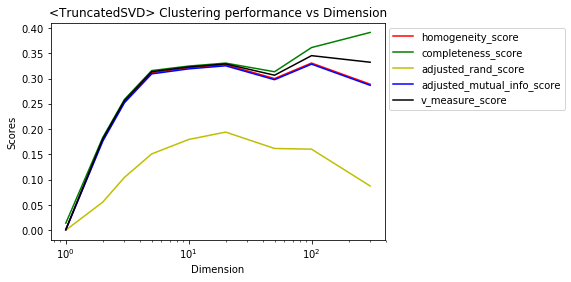

SVD MAX==================
100
##############################################################
Performing PCA...reduce dimension to 1
Dimension reduction method:PCA
Performing PCA...reduce dimension to 2
Dimension reduction method:PCA
Performing PCA...reduce dimension to 3
Dimension reduction method:PCA
Performing PCA...reduce dimension to 5
Dimension reduction method:PCA
Performing PCA...reduce dimension to 10
Dimension reduction method:PCA
Performing PCA...reduce dimension to 20
Dimension reduction method:PCA
Performing PCA...reduce dimension to 50
Dimension reduction method:PCA
Performing PCA...reduce dimension to 100
Dimension reduction method:PCA
Performing PCA...reduce dimension to 300
Dimension reduction method:PCA


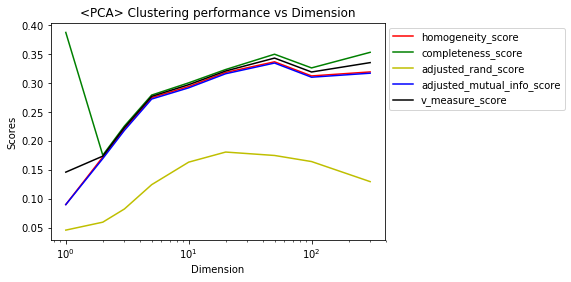

PCA MAX==================
50
##############################################################
Point distribution:


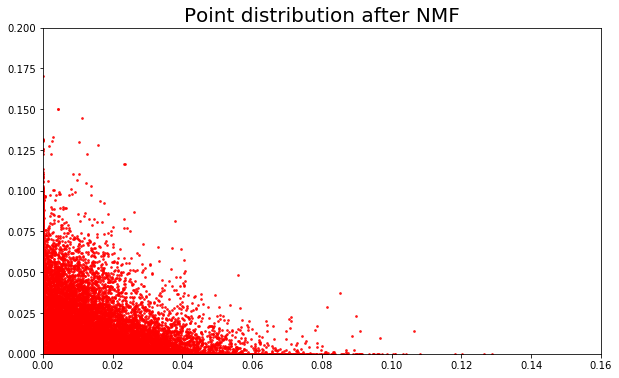

Performing NMF with/without logarithm transformation...reduce dimension to 1
Dimension reduction method:NMF
Dimension reduction method:NMF_LOG
Performing NMF with/without logarithm transformation...reduce dimension to 2
Dimension reduction method:NMF
Dimension reduction method:NMF_LOG
Performing NMF with/without logarithm transformation...reduce dimension to 3
Dimension reduction method:NMF
Dimension reduction method:NMF_LOG
Performing NMF with/without logarithm transformation...reduce dimension to 5
Dimension reduction method:NMF
Dimension reduction method:NMF_LOG
Performing NMF with/without logarithm transformation...reduce dimension to 10
Dimension reduction method:NMF
Dimension reduction method:NMF_LOG
Performing NMF with/without logarithm transformation...reduce dimension to 20
Dimension reduction method:NMF
Dimension reduction method:NMF_LOG
Performing NMF with/without logarithm transformation...reduce dimension to 50
Dimension reduction method:NMF
Dimension reduction method:NMF_

ValueError: Invalid RGBA argument: 'k--'

NMF without Log MAX==================
20
NMF with Log MAX==================
20


In [22]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from math import log
import matplotlib.pyplot as plt
import re

# =================================Obtain data==================================
comp_tech_subclasses = ['comp.graphics',
                        'comp.os.ms-windows.misc',
                        'comp.sys.ibm.pc.hardware',
                        'comp.sys.mac.hardware',
                        'comp.windows.x']

rec_act_subclasses = ['rec.autos',
                      'rec.motorcycles',
                      'rec.sport.baseball',
                      'rec.sport.hockey']

science_subclass = ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']

miscellaneous_subclass = ['misc.forsale']

politics_subclass = ['talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast']

religion_subclass = ['talk.religion.misc', 'alt.atheism', 'soc.religion.christian']

dataset = fetch_20newsgroups(subset='all',
                             categories=comp_tech_subclasses + rec_act_subclasses + science_subclass +
                                        miscellaneous_subclass + politics_subclass + religion_subclass,
                             shuffle=True,
                             random_state=42,
                             remove=('headers', 'footers', 'quotes'))
labels = dataset.target
# labels = [1] * len(dataset.data)
# for i in range(len(dataset.data)):
#     if dataset.target[i] > 3:
#         labels[i] = 0
# ==============================================================================

#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
# stemmer = SnowballStemmer("english")
def remove_punctuation(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join(re.split(punctuations, data_list[i]))
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
remove_punctuation(dataset.data)
#==============================================================================





#=======================Transform the data into TF-IDF=========================
vectorizer_mindf3 = TfidfVectorizer(min_df=3, stop_words='english')
X_mindf3= vectorizer_mindf3.fit_transform(dataset.data)
#==============================================================================

# ==============================================================================


# ==============================================================================

def k_means(X_reduced, labels, dim_reduce):
    # =============================K-Means Clustering===============================
    km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
    km.fit(X_reduced)
    # ==============================================================================

    # ================================Print results=================================

    homo = metrics.homogeneity_score(labels, km.labels_)
    complete = metrics.completeness_score(labels, km.labels_)
    rand = metrics.adjusted_rand_score(labels, km.labels_)
    mutual = metrics.adjusted_mutual_info_score(labels, km.labels_)
    vmeature = metrics.v_measure_score(labels, km.labels_)

    print ('Dimension reduction method:' + dim_reduce)
    # print 'Homogeneity:', metrics.homogeneity_score(labels, km.labels_)
    # print 'Completeness:', metrics.completeness_score(labels, km.labels_)
    # print 'Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km.labels_)
    # print 'Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km.labels_)
    # print '\nConfusion matrix:'
    # print '=============='
    # print metrics.confusion_matrix(labels, km.labels_)
    # print '=============='
    # print '-----------------------------------------------------'

    return homo, complete, rand, mutual, vmeature
    # ==============================================================================


# =========================Reduce Dimensionality (SVD)==========================
dimension_array = [1, 2, 3, 5, 10, 20, 50, 100, 300]
# dimension_array = range(165, 180)
print ('##############################################################')
homos = []
cmplts = []
rands = []
mutuals = []
vs = []

for d in dimension_array:
    print ('Performing truncatedSVD...reduce dimension to ' + str(d))
    svd = TruncatedSVD(n_components=d, n_iter=13, random_state=42)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X_reduced = lsa.fit_transform(X_mindf3)

    homo, cmplt, rand, mutual, v = k_means(X_reduced, labels, 'truncatedSVD')

    homos.append(homo)
    cmplts.append(cmplt)
    rands.append(rand)
    mutuals.append(mutual)
    vs.append(v)

plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.plot(dimension_array, vs, color='k', label='v_measure_score')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.55, 1))
plt.xlabel('Dimension')
plt.xscale('log')
plt.ylabel('Scores')
plt.title('<TruncatedSVD> Clustering performance vs Dimension')
plt.show()

print('SVD MAX==================')
print(r_list[vs.index(max(vs))])
print('==================')

# ==============================================================================

# =========================Reduce Dimensionality (PCA)==========================
dimension_array = [1, 2, 3, 5, 10, 20, 50, 100, 300]
print ('##############################################################')
homos = []
cmplts = []
rands = []
mutuals = []
vs = []
for d in dimension_array:
    print ('Performing PCA...reduce dimension to ' + str(d))

    pca = PCA(n_components=d, random_state=42)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(pca, normalizer)

    X_reduced = lsa.fit_transform(X_mindf3.toarray())

    homo, cmplt, rand, mutual, v = k_means(X_reduced, labels, 'PCA')

    homos.append(homo)
    cmplts.append(cmplt)
    rands.append(rand)
    mutuals.append(mutual)
    vs.append(v)

plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.plot(dimension_array, vs, color='k', label='v_measure_score')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.55, 1))
plt.xlabel('Dimension')
plt.xscale('log')
plt.ylabel('Scores')
plt.title('<PCA> Clustering performance vs Dimension')
plt.show()

print('PCA MAX==================')
print(r_list[vs.index(max(vs))])
print('==================')
# ==============================================================================


# =========================Reduce Dimensionality (NMF)==========================
dimension_array = [1, 2, 3, 5, 10, 20, 50, 100, 300]
print ('##############################################################')
print ('Point distribution:')

# dimension_array = range(13, 33)
nmf = NMF(n_components=2, random_state=42)
lsa = make_pipeline(nmf)
X_reduced = lsa.fit_transform(X_mindf3)

plt.clf()
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=3, c='r', alpha=0.8)
plt.title('Point distribution after NMF', fontsize=20)
plt.axis([0, 0.16, 0, 0.2])
plt.show()

homos = []
cmplts = []
rands = []
mutuals = []
vs = []

homosLog = []
cmpltsLog = []
randsLog = []
mutualsLog = []
vsLog = []

for d in dimension_array:
    print ('Performing NMF with/without logarithm transformation...reduce dimension to ' + str(d))
    nmf = NMF(n_components=d, random_state=42)
    lsa = make_pipeline(nmf)

    X_reduced = lsa.fit_transform(X_mindf3)

    homo, cmplt, rand, mutual, v = k_means(X_reduced, labels, 'NMF')

    homos.append(homo)
    cmplts.append(cmplt)
    rands.append(rand)
    mutuals.append(mutual)
    vs.append(v)
    # ----------------------------Non-linear Transformation-------------------------
    for j in range(X_reduced.shape[0]):
        for k in range(X_reduced.shape[1]):
            if X_reduced[j][k] == 0:
                X_reduced[j][k] = -3.08
            else:
                X_reduced[j][k] = log(X_reduced[j][k], 10)
    # ------------------------------------------------------------------------------

    homo, cmplt, rand, mutual, v = k_means(X_reduced, labels, 'NMF_LOG')

    homosLog.append(homo)
    cmpltsLog.append(cmplt)
    randsLog.append(rand)
    mutualsLog.append(mutual)
    vsLog.append(v)

plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.plot(dimension_array, vs, color='k', label='v_measure_score')
plt.plot(dimension_array, homosLog, 'r--', label='homogeneity_score LOG')
plt.plot(dimension_array, cmpltsLog, 'g--', label='completeness_score LOG')
plt.plot(dimension_array, randsLog, 'y--', label='adjusted_rand_score LOG')
plt.plot(dimension_array, mutualsLog, 'b--', label='adjusted_mutual_info_score LOG')
plt.plot(dimension_array, vsLog, color='m', label='v_measure_score')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.55, 1))
plt.xlabel('Dimension')
plt.xscale('log')
plt.ylabel('Scores')
plt.title('<NMF> Clustering performance vs Dimension')
plt.show()

print('NMF without Log MAX==================')
print(r_list[vs.index(max(vs))])
print('==================')

print('NMF with Log MAX==================')
print(r_list[vsLog.index(max(vsLog))])
print('==================')
# ==============================================================================

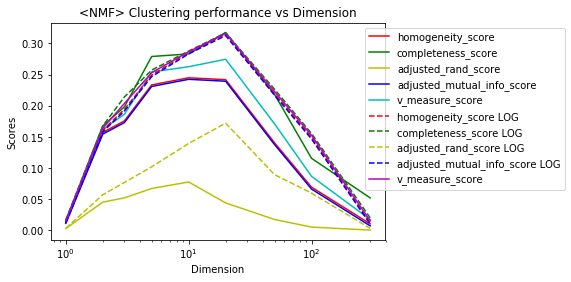

NMF without Log MAX==================
20
NMF with Log MAX==================
20


In [26]:
plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.plot(dimension_array, vs, color='c', label='v_measure_score')
plt.plot(dimension_array, homosLog, 'r--', label='homogeneity_score LOG')
plt.plot(dimension_array, cmpltsLog, 'g--', label='completeness_score LOG')
plt.plot(dimension_array, randsLog, 'y--', label='adjusted_rand_score LOG')
plt.plot(dimension_array, mutualsLog, 'b--', label='adjusted_mutual_info_score LOG')
plt.plot(dimension_array, vsLog, color='m', label='v_measure_score')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.55, 1))
plt.xlabel('Dimension')
plt.xscale('log')
plt.ylabel('Scores')
plt.title('<NMF> Clustering performance vs Dimension')
plt.show()

print('NMF without Log MAX==================')
print(r_list[vs.index(max(vs))])
print('==================')

print('NMF with Log MAX==================')
print(r_list[vsLog.index(max(vsLog))])
print('==================')
# ==============================================================================

##############################################################
Performing truncatedSVD...


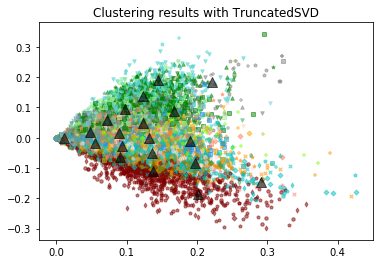

##############################################################
Performing PCA...


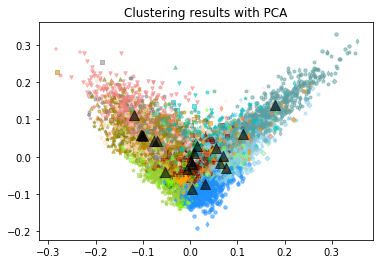

##############################################################
Performing NMF with logarithm...


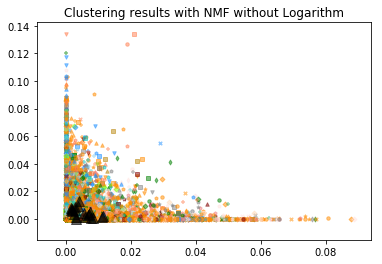

Performing NMF with logarithm transformation...


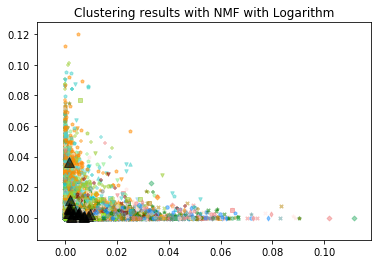

In [30]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from math import log
import matplotlib.pyplot as plt
import re
import numpy as np

# =================================Obtain data==================================
comp_tech_subclasses = ['comp.graphics',
                        'comp.os.ms-windows.misc',
                        'comp.sys.ibm.pc.hardware',
                        'comp.sys.mac.hardware',
                        'comp.windows.x']

rec_act_subclasses = ['rec.autos',
                      'rec.motorcycles',
                      'rec.sport.baseball',
                      'rec.sport.hockey']

science_subclass = ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']

miscellaneous_subclass = ['misc.forsale']

politics_subclass = ['talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast']

religion_subclass = ['talk.religion.misc', 'alt.atheism', 'soc.religion.christian']

dataset = fetch_20newsgroups(subset='all',
                             categories=comp_tech_subclasses + rec_act_subclasses + science_subclass +
                                        miscellaneous_subclass + politics_subclass + religion_subclass,
                             shuffle=True,
                             random_state=42,
                             remove=('headers', 'footers', 'quotes'))

labels = dataset.target
# labels = [1] * len(dataset.data)
# for i in range(len(dataset.data)):
#     if dataset.target[i] > 3:
#         labels[i] = 0
# ==============================================================================


#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
# stemmer = SnowballStemmer("english")
def remove_punctuation(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join(re.split(punctuations, data_list[i]))
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
remove_punctuation(dataset.data)
#==============================================================================


# =======================Transform the data into TF-IDF=========================
vectorizer = TfidfVectorizer(max_features=10000,
                             min_df=3,
                             stop_words='english',
                             use_idf=True)
X = vectorizer.fit_transform(dataset.data)
# ==============================================================================

# ==============================================================================


def plot_clusters(actual_labels, clustered_labels, X_2d, centers, reducer):
    # =================================Plot results=================================
    color = ["grey", "lightcoral", "maroon", "mistyrose", "coral", "peachpuff", "darkorange", "orange", "darkgoldenrod",
             "olive", "yellowgreen", "lawngreen", "lightgreen", "g", "mediumseagreen", "mediumturquoise", "c", "cadetblue",
             "skyblue", "dodgerblue"]
    mark = ["o", "+", "v", "^", "s", "p", "*", "D", "x", "d"]
    for i in range(len(labels)):
        plt.scatter(X_2d[i, 0], X_2d[i, 1], s=12, marker=mark[(actual_labels[i] % 10)], color=color[clustered_labels[i] % 20], alpha=0.5)
    for i in range(20):
        plt.scatter(centers[i, 0], centers[i, 1], marker='^', s=100, color='k', alpha=0.6)
    plt.title('Clustering results with ' + reducer)
    plt.show()

# ==============================================================================

# =========================Reduce Dimensionality (SVD)==========================
print ('##############################################################')
print ('Performing truncatedSVD...')
svd = TruncatedSVD(n_components=100, n_iter=13, random_state=42)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_reduced = lsa.fit_transform(X)

# k_means(X_reduced, labels, 'truncatedSVD')
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
km.fit(X_reduced)
clustered_labels = km.labels_

svd = TruncatedSVD(n_components=2, n_iter=13, random_state=42)
X_2d = svd.fit_transform(X)
km.fit(X_2d)
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_2d, centers, 'TruncatedSVD')

# ==============================================================================

# =========================Reduce Dimensionality (PCA)==========================
print ('##############################################################')
print ('Performing PCA...')

pca = PCA(n_components=50, random_state=42)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(pca, normalizer)

X_reduced = lsa.fit_transform(X.toarray())

# k_means(X_reduced, labels, 'PCA')
km.fit(X_reduced)
clustered_labels = km.labels_

pca = PCA(n_components=50, random_state=42)
X_2d = pca.fit_transform(X.toarray())
km.fit(X_2d)
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_2d, centers, 'PCA')
# ==============================================================================

# =========================Reduce Dimensionality (NMF)==========================
print ('##############################################################')
print ('Performing NMF with logarithm...')

nmf = NMF(n_components=20)
lsa = make_pipeline(nmf)
X_reduced = lsa.fit_transform(X)

km.fit(X_reduced)
clustered_labels = km.labels_
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_reduced, centers, 'NMF without Logarithm')

print ('Performing NMF with logarithm transformation...')
nmf = NMF(n_components=20)
lsa = make_pipeline(nmf)
X_reduced = lsa.fit_transform(X)

# ----------------------------Non-linear Transformation-------------------------
for j in range(X_reduced.shape[0]):
    for k in range(X_reduced.shape[1]):
        if X_reduced[j][k] == 0:
            X_reduced[j][k] = -3.08
        else:
            X_reduced[j][k] = log(X_reduced[j][k], 10)
# ------------------------------------------------------------------------------

km.fit(X_reduced)
clustered_labels = km.labels_

nmf = NMF(n_components=20)
X_2d = nmf.fit_transform(X)
km.fit(X_2d)
centers = km.cluster_centers_

plot_clusters(labels, clustered_labels, X_2d, centers, 'NMF with Logarithm')
# ==============================================================================